# Mathematics for Machine Learning

## Session 25: Jacobian Matrix, multivariate chain rule, backpropagaion

### Gerhard Jäger


January 30, 2025

---
<br><br>

<small>Most material taken from Chapter 11 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012 and Chapter 5 of Deisenroth, Faisal & Ong's (2024) Mathematics for Machine Learning,.</small><br>
<small>Applets programmed with the help of ChatGPT and Perplexity</small>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline


## Jacobi matrix

So far we have considered functions with multiple inputs and a single output.

$$
f \in \mathbb R^m \mapsto \mathbb R\\
y = f(x_1, \ldots, x_m)
$$

The **gradient** of such a function is the vector of partial derivatives.

$$
\nabla f(x_1,\ldots,x_n) = \left[\frac{\partial z}{\partial x_1}, \cdots, \frac{\partial z}{\partial x_m}\right]
$$

I will represent the gradient as a row vector – the literature is inconsistent in this regard.

Now let us move to functions with multiple inputs and multiple outputs.

$$
\begin{align}
f &\in \mathbb R^m\mapsto \mathbb R^n\\
z_1 &= f_1(x_1,\ldots, x_m)\\
&\vdots\\
z_n &= f_n(x_1,\ldots, x_m)\\
\end{align}
$$

Each output $z_i$ has a gradient $\nabla z_i$. We collect them in a matrix, where each row is the gradient of one output. This matrix is called the **Jacobian Matrix**.

$$
\boldsymbol J = \begin{bmatrix}
\frac{\partial z_1}{\partial x_1} & \cdots & \frac{\partial z_1}{\partial x_m}\\
\vdots & & \vdots\\
\frac{\partial z_n}{\partial x_1} & \cdots & \frac{\partial z_n}{\partial x_m}
\end{bmatrix}
$$

## Example: Jacobian Matrix for a $2 \times 2$ Function  

Let’s consider a function with two inputs and two outputs:

$$
\begin{aligned}
    f &: \mathbb{R}^2 \to \mathbb{R}^2 \\
    (x_1, x_2) &\mapsto (z_1, z_2)
\end{aligned}
$$

where

$$
\begin{aligned}
    z_1 &= f_1(x_1, x_2) = x_1^2 + x_2^2 \\
    z_2 &= f_2(x_1, x_2) = x_1 x_2
\end{aligned}
$$

### Computing the Partial Derivatives  

We compute the gradients of $z_1$ and $z_2$:

$$
\nabla z_1 = \left[\frac{\partial z_1}{\partial x_1}, \frac{\partial z_1}{\partial x_2} \right] = \left[2x_1, 2x_2 \right]
$$

$$
\nabla z_2 = \left[\frac{\partial z_2}{\partial x_1}, \frac{\partial z_2}{\partial x_2} \right] = \left[x_2, x_1 \right]
$$





### Constructing the Jacobi Matrix  

The Jacobian matrix is given by:

$$
\boldsymbol{J} =
\begin{bmatrix}
\frac{\partial z_1}{\partial x_1} & \frac{\partial z_1}{\partial x_2} \\
\frac{\partial z_2}{\partial x_1} & \frac{\partial z_2}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
2x_1 & 2x_2 \\
x_2 & x_1
\end{bmatrix}
$$

This matrix represents how small changes in $x_1$ and $x_2$ affect the outputs $z_1$ and $z_2$.


## Example: Jacobian Matrix for a Single Dense Layer

In a **dense (fully connected) layer**, the transformation is:

$$
\mathbf{z} = f(\mathbf{x}, \mathbf{W}, \mathbf{b}) = \mathbf{W} \mathbf{x} + \mathbf{b}
$$

where:

- **Input**: $ \mathbf{x} \in \mathbb{R}^m $ (fixed input vector),
- **Weights**: $ \mathbf{W} \in \mathbb{R}^{n \times m} $ (trainable parameters),
- **Bias**: $ \mathbf{b} \in \mathbb{R}^n $ (trainable bias vector),
- **Output**: $ \mathbf{z} \in \mathbb{R}^n $.

We now compute the **Jacobian with respect to the weights and biases**, treating $ \mathbf{x} $ as fixed.

### Computing Partial Derivatives

For the weights:

$$
\frac{\partial z_i}{\partial W_{ij}} = x_j
$$

For the biases:

$$
\frac{\partial z_i}{\partial b_i} = 1, \quad \frac{\partial z_i}{\partial b_j} = 0 \text{ for } i \neq j
$$


## Constructing the Jacobian Matrix

The Jacobian matrix $ \mathbf{J} $ consists of partial derivatives of $ \mathbf{z} $ with respect to $ \mathbf{W} $ and $ \mathbf{b} $:

$$
\mathbf{J} =
\begin{bmatrix}
\frac{\partial z_1}{\partial W_{11}} & \cdots & \frac{\partial z_1}{\partial W_{1m}} & \frac{\partial z_1}{\partial W_{21}} & \cdots & \frac{\partial z_1}{\partial W_{nm}} & \frac{\partial z_1}{\partial b_1} & \cdots & \frac{\partial z_1}{\partial b_n} \\
\vdots & & \vdots & \vdots & & \vdots & \vdots & & \vdots \\
\frac{\partial z_n}{\partial W_{11}} & \cdots & \frac{\partial z_n}{\partial W_{1m}} & \frac{\partial z_n}{\partial W_{21}} & \cdots & \frac{\partial z_n}{\partial W_{nm}} & \frac{\partial z_n}{\partial b_1} & \cdots & \frac{\partial z_n}{\partial b_n}
\end{bmatrix}
$$

Expanding the derivatives:

$$
\mathbf{J} =
\begin{bmatrix}
x_1 & x_2 & \cdots & x_m & 0 & \cdots & 0 & 1 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 & x_1 & \cdots & x_m & 0 & 1 & \cdots & 0 \\
\vdots & & \vdots & & \vdots & & \vdots & & \vdots & & \vdots \\
0 & 0 & \cdots & 0 & 0 & \cdots & 0 & 0 & 0 & \cdots & 1
\end{bmatrix}
$$

This shows that:

- Each **weight** $ W_{ij} $ has a derivative equal to $ x_j $.
- Each **bias** term has a derivative of 1 for its corresponding output neuron.

This structure is fundamental in backpropagation, as it determines how gradients are propagated for weight and bias updates.


## Interlude: using the Jacobian for substitution in multiple integrals

Recall the substitution rule for integration:

$$
\int f(y) dy = \int f(g(x))g'(x) dx
$$


For functions with multiple variables, a similar principle applies, but instead of a single derivative, we use the **Jacobian determinant**.

### Change of Variables in Multiple Integrals

Suppose we have a transformation:

$$
\begin{aligned}
    x_1 &= g_1(u_1, u_2, \dots, u_m) \\
    x_2 &= g_2(u_1, u_2, \dots, u_m) \\
    &\vdots \\
    x_m &= g_m(u_1, u_2, \dots, u_m)
\end{aligned}
$$

where $(x_1, \dots, x_m)$ are the original variables and $(u_1, \dots, u_m)$ are the new variables.

The volume element transforms as:

$$
dx_1 \, dx_2 \dots dx_m = \left| \det \boldsymbol{J} \right| du_1 \, du_2 \dots du_m
$$

Thus, the integral transforms as:

$$
\int_{\mathcal{D}_x} f(x_1, \dots, x_m) \, dx_1 \dots dx_m =
\int_{\mathcal{D}_u} f(g_1, \dots, g_m) \left| \det \boldsymbol{J} \right| du_1 \dots du_m
$$




This is particularly useful when converting between coordinate systems, such as:

- Cartesian $\to$ Polar: $dx\,dy = r \, dr \, d\theta$
- Cartesian $\to$ Spherical: $dx\,dy\,dz = r^2 \sin\theta \, dr \, d\theta \, d\phi$

We will now apply this principle to an example.

## Example – Change of Variables in a Double Integral

Consider the integral:

$$
I = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2 + y^2)} \, dx \, dy
$$

This integral is much easier to evaluate in **polar coordinates**.

### Step 1: Define the Transformation
We use the standard transformation from Cartesian to polar coordinates:

$$
x = r \cos \theta, \quad y = r \sin \theta
$$

where $r \geq 0$ and $\theta \in [0, 2\pi]$.

### Step 2: Compute the Jacobian Matrix
The Jacobian matrix is:

$$
\boldsymbol{J} =
\begin{bmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & -r \sin \theta \\
\sin \theta & r \cos \theta
\end{bmatrix}
$$




### Step 3: Compute the Determinant
The determinant of $\boldsymbol{J}$ is:

$$
\det \boldsymbol{J} =
\begin{vmatrix}
\cos \theta & -r \sin \theta \\
\sin \theta & r \cos \theta
\end{vmatrix}
= r (\cos^2 \theta + \sin^2 \theta) = r
$$

Thus, the volume element transforms as:

$$
dx \, dy = \left| \det \boldsymbol{J} \right| dr \, d\theta = r \, dr \, d\theta
$$


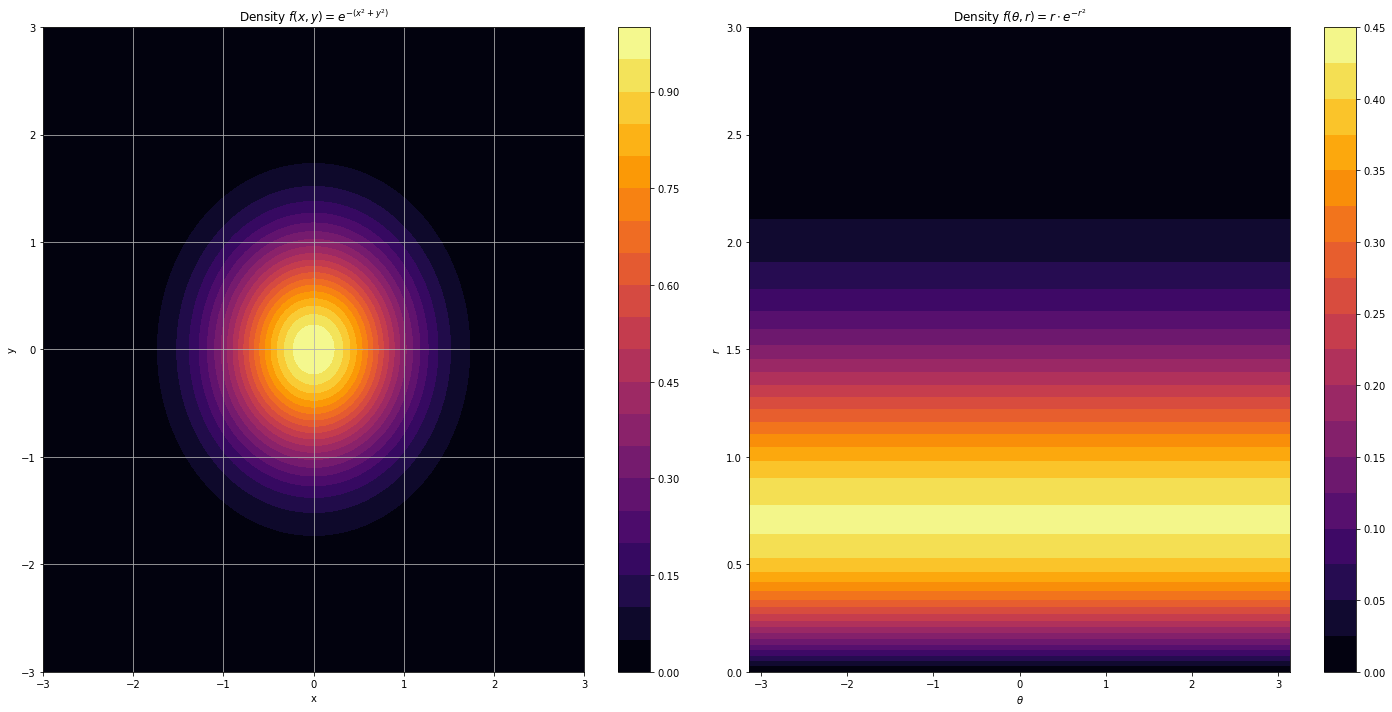

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limits for the polar coordinate system
theta_limits = (-np.pi, np.pi)
r_limits = (0, 10)

# Define theta values
theta_vals = np.linspace(-np.pi/2 + 0.01, np.pi/2 - 0.01, 300)
theta_vals_sin = np.linspace(0.01, np.pi - 0.01, 300)

# Create a grid for the Cartesian plot
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Calculate the density f(x, y) = exp(-(x^2 + y^2))
f_xy = np.exp(-(X**2 + Y**2))

# Create a polar grid for the polar plot
r = np.linspace(0, 3, 300)
theta = np.linspace(-np.pi, np.pi, 300)
R, Theta = np.meshgrid(r, theta)

# Calculate the density f(θ, r) = r * exp(-r^2) in polar coordinates
f_theta_r = R * np.exp(-R**2)

# Create the figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# --- Cartesian plot ---
# Plot the density f(x, y) = exp(-(x^2 + y^2))
cp = ax[0].contourf(X, Y, f_xy, levels=20, cmap='inferno')
fig.colorbar(cp, ax=ax[0])

# Set labels and grid for Cartesian plot
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Density $f(x, y) = e^{-(x^2 + y^2)}$')
ax[0].grid()

# --- Polar plot ---
# Plot the density f(θ, r) = r * exp(-r^2) in polar coordinates
cp_polar = ax[1].contourf(Theta, R, f_theta_r, levels=20, cmap='inferno')
fig.colorbar(cp_polar, ax=ax[1])

# Set labels and grid for Polar plot
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$r$')
ax[1].set_title(r'Density $f(\theta, r) = r \cdot e^{-r^2}$')

# Show the plots
plt.tight_layout()
plt.show()


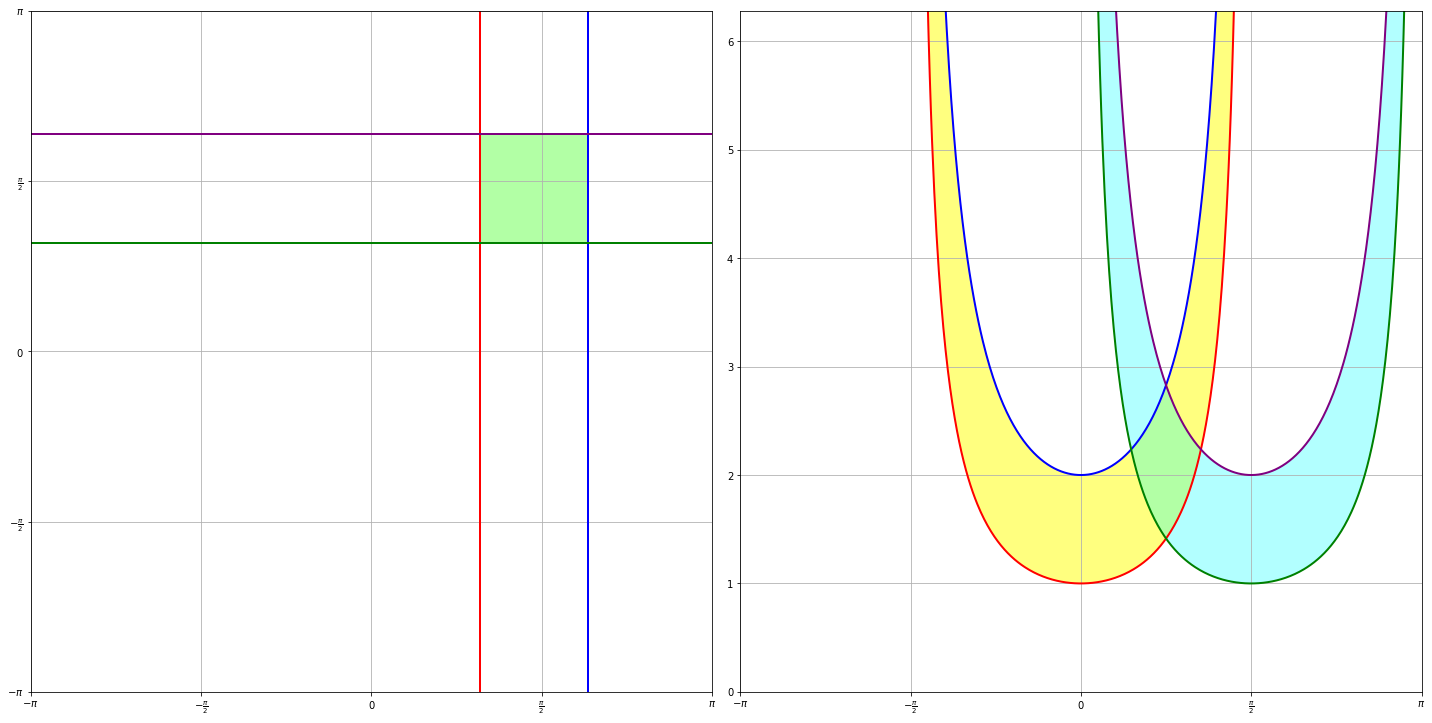

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limits for the polar coordinate system
theta_limits = (-np.pi, np.pi)
r_limits = (0, 10)

# Define theta values
theta_vals = np.linspace(-np.pi/2 + 0.01, np.pi/2 - 0.01, 300)
theta_vals_sin = np.linspace(0.01, np.pi - 0.01, 300)

# Compute r values for the curves
r_vals = 1 / np.cos(theta_vals)  # r = 1 / cos(θ)
r_vals_2 = 2 / np.cos(theta_vals)  # r = 2 / cos(θ)
r_vals_sin = 1 / np.sin(theta_vals_sin)  # r = 1 / sin(θ)
r_vals_sin_2 = 2 / np.sin(theta_vals_sin)  # r = 2 / sin(θ)

# Create a figure with two subplots: one for polar and one for Cartesian coordinates
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# --- Cartesian plot ---
# Plot the lines x=1, x=2, y=1, y=2
ax[0].axvline(x=1, color='red', linewidth=2)  # x=1
ax[0].axvline(x=2, color='blue', linewidth=2)  # x=2
ax[0].axhline(y=1, color='green', linewidth=2)  # y=1
ax[0].axhline(y=2, color='purple', linewidth=2)  # y=2

# Fill the region between x=1 and x=2 (yellow) and y=1 and y=2 (cyan)
ax[0].fill_betweenx([1, 2], 1, 2, color='yellow', alpha=0.5)
ax[0].fill_between([1, 2], 1, 2, color='cyan', alpha=0.3)

# Set the axis limits for the Cartesian plot (centered at origin for y-axis)
ax[0].set_xlim(-np.pi, np.pi)
ax[0].set_ylim(-np.pi, np.pi)

# Set ticks for Cartesian plot
ax[0].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[0].set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])

# Set ticks for y-axis (similarly to x-axis)
ax[0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[0].set_yticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])

# Draw grid lines for Cartesian plot
ax[0].grid()

# Set aspect ratio to 1:1 for Cartesian plot
ax[0].set_aspect('equal', adjustable='box')

# --- Polar plot ---
# Plot the curves r = 1 / cos(θ), r = 2 / cos(θ), r = 1 / sin(θ), and r = 2 / sin(θ)
ax[1].plot(theta_vals, r_vals, color='red', linewidth=2)  # r = 1 / cos(θ)
ax[1].plot(theta_vals, r_vals_2, color='blue', linewidth=2)  # r = 2 / cos(θ)
ax[1].plot(theta_vals_sin, r_vals_sin, color='green', linewidth=2)  # r = 1 / sin(θ)
ax[1].plot(theta_vals_sin, r_vals_sin_2, color='purple', linewidth=2)  # r = 2 / sin(θ)

# Fill the area between the red and blue curves (r = 1 / cos(θ) and r = 2 / cos(θ))
ax[1].fill_between(theta_vals, r_vals, r_vals_2, color='yellow', alpha=0.5)

# Fill the transparent area between the green and purple curves (r = 1 / sin(θ) and r = 2 / sin(θ))
ax[1].fill_between(theta_vals_sin, r_vals_sin, r_vals_sin_2, color='cyan', alpha=0.3)

# Set the axis limits for the polar plot
ax[1].set_xlim(theta_limits)
ax[1].set_ylim(0, 2 * np.pi)

# Set ticks for θ at key points
ax[1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1].set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])

# Draw grid lines for polar plot
ax[1].grid()

# Set aspect ratio to 1:1 for polar plot
ax[1].set_aspect('equal', adjustable='box')

# Show the plot
plt.tight_layout()
plt.show()


## Solving the Integral

Using the change of variables, the integral becomes:

$$
I = \int_0^{2\pi} \int_0^\infty e^{-r^2} r \, dr \, d\theta
$$

### Step 1: Solve the Inner Integral
Let $u = r^2 \Rightarrow du = 2r \, dr$, so:

$$
\int_0^\infty e^{-r^2} r \, dr = \frac{1}{2} \int_0^\infty e^{-u} \, du = \frac{1}{2}
$$

### Step 2: Solve the Outer Integral
Since the outer integral is simply over $\theta$:

$$
\int_0^{2\pi} d\theta = 2\pi
$$




### Final Result
Multiplying both results:

$$
I = \frac{1}{2} \cdot 2\pi = \pi
$$

Thus, we have shown that:

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2 + y^2)} \, dx \, dy = \pi
$$



## The multivariate chain rule

We have to distinguish several scenarios. The following three are the essential ones – they easily generalize to multiple outputs.

<img src="_img/scenarios.svg"  width="2000" style="display: block; margin-left: auto; margin-right: auto;">



## Scenario 1

$$
\begin{align}
z &= f(x_1,x_2)\\
x_1 &= g_1(t)\\
x_2 &= g_2(t)\\
\frac{\Delta z}{\Delta t} &= \frac{f(g_1(t+\Delta t), g_2(t+\Delta t))-f(g_1(t), g_2(t))}{\Delta t}
\end{align}
$$

According to the Increment Theorem for single variables:

$$
\begin{align}
\frac{\Delta z}{\Delta t} &= \frac{f(g_1(t+\Delta t), g_2(t+\Delta t))-f(g_1(t), g_2(t))}{\Delta t}\\
&=\frac{f(g_1(t)+(g_1'(t)+\varepsilon_1)\Delta t, g_2(t)+(g_2'(t)+\varepsilon_2)\Delta t))-f(g_1(t), g_2(t))}{\Delta t}\\
\end{align}
$$

According to the Increment Theorem for Two Variables:

$$
\begin{align}
\frac{\Delta z}{\Delta t} 
&=\frac{f(g_1(t)+(g_1'(t)+\varepsilon_1)\Delta t, g_2(t)+(g_2'(t)+\varepsilon_2)\Delta t))-f(g_1(t), g_2(t))}{\Delta t}\\
&\approx\frac{\partial f(x_1, x_2)}{\partial x_1}g_1'(t) + \frac{\partial f(x_1, x_2)}{\partial x_2}g_2'(t)\\
\frac{dz}{dt}&= \frac{\partial f(x_1, x_2)}{\partial x_1}g_1'(t) + \frac{\partial f(x_1, x_2)}{\partial x_2}g_2'(t)
\end{align}
$$


The Jacobian of $f$ is

$$
\boldsymbol J_f = \nabla f = \begin{bmatrix}\frac{\partial f(x_1,x_2)}{\partial x1}&\frac{\partial f(x_1,x_2)}{\partial x2}\end{bmatrix}
$$

The Jacobian of $g$ is the column vector of the gradients of $g_1$ and $g_2$.

$$
\boldsymbol J_g = \begin{bmatrix}
g_1'(t)\\
g_2'(t)
\end{bmatrix}
$$

The Jacobian of $z$ is a $1\times 1$ matrix containing $\frac{dz}{dt}$.

Putting things together, we get

$$
\boldsymbol J_z = \boldsymbol J_f \boldsymbol J_g
$$

## Scenario 2

$$
\begin{align}
z &= f(x)\\
x &= g(s,t)
\end{align}
$$

In this scenario, we only need the chain rule for single variables

$$
\begin{align}
\frac{\partial z}{\partial s} &= \frac{\partial g(s,t)}{\partial s}f'(g(s,t))\\
\frac{\partial z}{\partial t} &= \frac{\partial g(s,t)}{\partial t}f'(g(s,t))\\
\end{align}
$$

Here the Jacobian of $f$ is the $1\times 1$ matrix:

$$\boldsymbol J_f = f'(g(s,t))$$

The Jacobian of $g$ is 

$$
\boldsymbol J_g = \begin{bmatrix}\frac{\partial f(s,t)}{\partial s} & \frac{\partial f(s,t)}{\partial s}\end{bmatrix}
$$

The Jacobian of $z$ is 

$$
\boldsymbol J_z = \begin{bmatrix}\frac{\partial z}{\partial s} & \frac{\partial z}{\partial s}\end{bmatrix}
$$

So, here we also have

$$
\boldsymbol J_z = \boldsymbol J_f \boldsymbol J_g
$$

## Scenario 3

$$
\begin{align}
z &= f(x,y)\\
x &= g_1(s,t)\\
y &= g_2(s,t)
\end{align}
$$

Effectively, this is twice Scenario 1

$$
\begin{align}
\frac{dz}{ds} &= \frac{\partial g_1(s,t)}{\partial s}\frac{\partial f(x,y)}{\partial x} + \frac{\partial g_2(s,t)}{\partial s}\frac{\partial f(x,y)}{\partial y}\\
\frac{dz}{dt} &= \frac{\partial g_1(s,t)}{\partial t}\frac{\partial f(x,y)}{\partial x} + \frac{\partial g_2(s,t)}{\partial t}\frac{\partial f(x,y)}{\partial y}\\
\end{align}
$$

Here the Jacobian of $f$ is

$$
\boldsymbol J_f = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x}&\frac{\partial f(x,y)}{\partial y}\end{bmatrix}
$$

The Jacobian of $g$ is

$$
\begin{align}
\boldsymbol J_g &= \begin{bmatrix}
\frac{\partial g_1(s,t)}{\partial s} & \frac{\partial g_1(s,t)}{\partial t}\\
\frac{\partial g_2(s,t)}{\partial s} & \frac{\partial g_2(s,t)}{\partial t}\\
\end{bmatrix}
\end{align}
$$

So we again have

$$
\boldsymbol J_z = \boldsymbol J_f \boldsymbol J_g
$$

If we have multiple dependent variables, this amounts to multiple rows in the Jacobian of $f$. So the reduction of the chain rule to matrix multiplication of Jacobians also holds.

### Multivariate Chain Rule

Let $f$ be a function $\mathbb R^k\mapsto \mathbb R^n$ and $g$ be a function $\mathbb R^k\mapsto \mathbb R^m$. Then the Jacobian of $f(g(\boldsymbol x))$ is

$$
\boldsymbol J_{f\circ g} = \boldsymbol J_f \boldsymbol J_g
$$

Note that $\boldsymbol J_g$ has to be evaluated at $\boldsymbol x$, and $\boldsymbol J_f$ at $g(\boldsymbol x)$.

## 2x2x2 Example - Part 1

#### Scenario: $ f: \mathbb{R}^2 \to \mathbb{R}^2 $ and $ g: \mathbb{R}^2 \to \mathbb{R}^2 $

Let $ f $ and $ g $ be functions from $ \mathbb{R}^2 $ to $ \mathbb{R}^2 $:

$$
f: \mathbb{R}^2 \to \mathbb{R}^2 \quad \text{and} \quad g: \mathbb{R}^2 \to \mathbb{R}^2
$$

For example:

$$
f(x_1, x_2) = \begin{bmatrix} x_1^2 + x_2^2 \\ x_1 \cdot x_2 \end{bmatrix}, \quad g(s, t) = \begin{bmatrix} s + t \\ s - t \end{bmatrix}
$$

We want to compute the Jacobian of the composition $ f(g(s, t)) $.

#### Jacobian of $ f(x_1, x_2) $:

The Jacobian of $ f(x_1, x_2) $ is:

$$
\boldsymbol{J}_f = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\ \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} \end{bmatrix}
= \begin{bmatrix} 2x_1 & 2x_2 \\ x_2 & x_1 \end{bmatrix}
$$

#### Jacobian of $ g(s, t) $:

The Jacobian of $ g(s, t) $ is:

$$
\boldsymbol{J}_g = \begin{bmatrix} \frac{\partial g_1}{\partial s} & \frac{\partial g_1}{\partial t} \\ \frac{\partial g_2}{\partial s} & \frac{\partial g_2}{\partial t} \end{bmatrix}
= \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

#### Jacobian of $ f(g(s,t)) $:

Now, using the chain rule:

$$
\boldsymbol{J}_z = \boldsymbol{J}_f \cdot \boldsymbol{J}_g
$$

Substituting the Jacobians:

$$
\boldsymbol{J}_z = \begin{bmatrix} 2x_1 & 2x_2 \\ x_2 & x_1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$





## 2x2x2 Example - Part 2

#### Calculating the Jacobian of $ f(g(s, t)) $

Substitute $ g(s, t) = \begin{bmatrix} s + t \\ s - t \end{bmatrix} $ into $ f(x_1, x_2) $:

- $ x_1 = s + t $
- $ x_2 = s - t $

Thus, the Jacobian of $ f $ becomes:

$$
\boldsymbol{J}_f = \begin{bmatrix} 2(s + t) & 2(s - t) \\ s - t & s + t \end{bmatrix}
$$

Now, multiply by the Jacobian of $ g $:

$$
\boldsymbol{J}_z = \begin{bmatrix} 2(s + t) & 2(s - t) \\ s - t & s + t \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

This gives:

$$
\boldsymbol{J}_z = \begin{bmatrix} 2(s + t) + 2(s - t) & 2(s + t) - 2(s - t) \\ (s - t) + (s + t) & (s - t) - (s + t) \end{bmatrix}
$$

Simplifying:

$$
\boldsymbol{J}_z = \begin{bmatrix} 4s & 4t \\ 2s & -2t \end{bmatrix}
$$

Thus, the Jacobian of $ f(g(s,t)) $ is:

$$
\boldsymbol{J}_z = \begin{bmatrix} 4s & 4t \\ 2s & -2t \end{bmatrix}
$$





### Recap:

We used the **multivariate chain rule** to compute the Jacobian of the composition $ f(g(s,t)) $. The final Jacobian is:

$$
\boldsymbol{J}_z = \begin{bmatrix} 4s & 4t \\ 2s & -2t \end{bmatrix}
$$

This result shows how small changes in $ s $ and $ t $ affect the output of the composed function $ f(g(s,t)) $.


## Introduction to Backpropagation

Backpropagation is an algorithm used for training neural networks by updating the weights based on the gradient of the loss function.

#### The basic idea:
- The goal is to minimize a loss function $ \mathcal{L} $ with respect to the network parameters (weights $ W $ and biases $ b $).
- **Forward pass**: Compute the output of the network for a given input.
- **Backward pass**: Compute the gradients of the loss function with respect to the parameters by applying the **chain rule**.


**Important**

The Jacobian of a layer is not just a matrix, but a function from the inputs and parameters of that layer to a matrix. So for each layer, you have to evaluate this function at its current input/parameter values to get a matrix of partial derivatives, which can then be used for matrix multiplication.



## The Chain Rule in Backpropagation

To update the weights, we need the gradient of the loss function $ \mathcal{L} $ with respect to each parameter $ W $. This requires applying the **chain rule** from calculus:

$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L}}{\partial z}  \frac{\partial z}{\partial W}
$$

Where:
- $ z $ is the output of a layer.
- The first term $ \frac{\partial \mathcal{L}}{\partial z} $ is the **error term** from the next layer.
- The second term $ \frac{\partial z}{\partial W} $ is the **Jacobian** of the activation function with respect to the weights.

The chain rule allows us to **propagate the errors** backward through the network layer by layer.



## Backpropagation and the Jacobian Matrix

Consider a simple neural network with two layers:

1. **Layer 1**: $ z_1 = W_1 x + b_1 $
2. **Layer 2**: $ z_2 = W_2 z_1 + b_2 $

The **Jacobian** matrices describe how small changes in the weights affect the output:

- For the first layer:
  $$ \boldsymbol{J}_1 = \frac{\partial z_1}{\partial W_1} = x $$

- For the second layer:
  $$ \boldsymbol{J}_2 = \frac{\partial z_2}{\partial W_2} = z_1 $$

Using the **chain rule** to compute the gradient of the loss with respect to each weight:

$$
\frac{\partial \mathcal{L}}{\partial W_2} = \frac{\partial \mathcal{L}}{\partial z_2} \cdot \boldsymbol{J}_2
$$

$$
\frac{\partial \mathcal{L}}{\partial W_1} = \frac{\partial \mathcal{L}}{\partial z_2} \cdot \boldsymbol{J}_2 \cdot \boldsymbol{J}_1
$$

This allows us to propagate the error back through the network.



## Example of Backpropagation

Consider a simple neural network with the following parameters and functions:

1. **Activation Function**: $ \sigma(z) = \text{ReLU}(z) $
2. **Loss Function**: $ \mathcal{L} = \frac{1}{2} (y_{\text{true}} - y_{\text{pred}})^2 $

#### Step 1: Compute Forward Pass
- Compute $ z_1 $, $ z_2 $, and the final output $ y_{\text{pred}} $.

#### Step 2: Compute Gradients with Respect to the Output
- Compute the derivative of the loss function with respect to $ y_{\text{pred}} $.

$$
\frac{\partial \mathcal{L}}{\partial y_{\text{pred}}} = y_{\text{pred}} - y_{\text{true}}
$$

#### Step 3: Backpropagate the Error
- Propagate the error backward using the chain rule to update the weights.

$$
\frac{\partial \mathcal{L}}{\partial W_2} = \frac{\partial \mathcal{L}}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial W_2}
$$


## Applying the Jacobian to Neural Networks

In a deep neural network, each layer's weights and activations can be seen as compositions of functions. Using the **Jacobian matrix** and **chain rule**, backpropagation allows us to compute the gradient of the loss function with respect to each weight.

For example, for a deep network with layers:

- Layer 1: $ z_1 = W_1 x + b_1 $
- Layer 2: $ z_2 = W_2 z_1 + b_2 $
- Layer 3: $ z_3 = W_3 z_2 + b_3 $

The total gradient of the loss function with respect to $ W_1 $ is:

$$
\frac{\partial \mathcal{L}}{\partial W_1} = \frac{\partial \mathcal{L}}{\partial z_3} \cdot \frac{\partial z_3}{\partial z_2} \cdot \frac{\partial z_2}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}
$$

This recursive application of the chain rule allows for efficient computation of gradients, which are then used to update the weights through optimization algorithms like **gradient descent**.


<img src="_img/backpropagation.svg"  width="2000" style="display: block; margin-left: auto; margin-right: auto;">
